### New York City Taxi and TLC Record
New York City TLC Trip Record Data Dictionary adalah dokumentasi yang menjelaskan struktur data dan arti dari setiap kolom pada dataset yang digunakan untuk mencatat perjalanan taksi di Kota New York. Dataset ini biasanya disediakan oleh Taxi and Limousine Commission (TLC) Kota New York dan berisi detail tentang perjalanan taksi kuning atau hijau (livery).

### Objective

Analisis ini bertujuan untuk memahami pola dan karakteristik perjalanan jarak dekat dalam layanan transportasi, terutama untuk meningkatkan efisiensi operasional, menentukan strategi harga, dan meningkatkan pengalaman pelanggan. Tujuan dari analisis ini adalah:

1. Pemahaman Pola Perjalanan
    - Tujuan: Untuk mengidentifikasi karakteristik perjalanan jarak dekat, seperti lokasi yang paling sering digunakan (pickup dan drop-off), waktu perjalanan yang paling sibuk, dan distribusi jarak perjalanan.
2. Optimasi Pengelolaan Waktu
    - Tujuan: Memahami pola waktu perjalanan (seperti jam sibuk, hari, atau bulan) agar layanan bisa lebih terencana dengan baik.
3. Analisis Biaya dan Pendapatan
    - Tujuan: Memahami biaya total perjalanan (termasuk tarif dasar dan biaya tambahan) serta pengaruh tip terhadap total pendapatan.
4. Evaluasi Metode Pembayaran
    - Tujuan: Mengetahui metode pembayaran yang paling sering digunakan oleh pelanggan (misalnya, kartu kredit atau tunai) dan hubungannya dengan tip yang diberikan.
5. Perencanaan Layanan dan Pengaturan Tarif
    - Tujuan: Menganalisis jenis perjalanan (street-hail atau dispatch) dan jenis tarif yang sering diterapkan untuk perjalanan jarak dekat.

### Langkah 1: Import & Load Data

In [1]:
# Import Library

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load Data File

df = pd.read_csv(r"D:\Purwadhika\New York City Taxi and Limousine Trip Record-20241224T113721Z-001\New York City Taxi and Limousine Trip Record\NYC TLC Trip Record.csv")

C:\Users\Lukik\AppData\Local\Temp\ipykernel_12776\1331064078.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"D:\Purwadhika\New York City Taxi and Limousine Trip Record-20241224T113721Z-001\New York City Taxi and Limousine Trip Record\NYC TLC Trip Record.csv")


In [3]:
# Lakukan copy data untuk membackup data asli

df_copy = df.copy()

### Langkah 2: Memahami Data
- Menampilkan informasi kolom, baris, tipe data, data hilang, dll

In [4]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [5]:
df_copy.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


In [6]:
# Menampilkan data yang hilang

df_copy.isna().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

### Langkah 3: Pembersihan Data

- **Merubah tipe data** kolom `lpep_pickup_datetime` dan `lpep_dropoff_datetime` menjadi tipe data **date time**

In [7]:
df_copy['lpep_pickup_datetime'] = pd.to_datetime(df_copy['lpep_pickup_datetime'])
df_copy['lpep_dropoff_datetime'] = pd.to_datetime(df_copy['lpep_dropoff_datetime'])

In [8]:
df_copy.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                       float64
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
dtype: object

In [9]:
df_copy.rename(columns={'VendorID' : 'vendor_id',
                            'PULocationID':'pu_location_id',
                            'DOLocationID': 'do_location_id',
                            'RatecodeID' : 'ratecode_id'},inplace=True)

- Membuat variabel dataframe baru

In [10]:
df_taxi_nyc = df_copy[['vendor_id', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'ratecode_id', 'pu_location_id', 'do_location_id',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge' ]]
df_taxi_nyc.head()

,vendor_id,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,ratecode_id,pu_location_id,do_location_id,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00


In [11]:
df_taxi_nyc.isna().sum()

vendor_id                   0
lpep_pickup_datetime        0
lpep_dropoff_datetime       0
store_and_fwd_flag       4324
ratecode_id              4324
pu_location_id              0
do_location_id              0
passenger_count          4324
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
payment_type             4324
trip_type                4334
congestion_surcharge     4324
dtype: int64

In [12]:
print('Missing data %:')
round(df_taxi_nyc.isna().sum()*100/df.shape[0],2)

Missing data %:


vendor_id                0.00
lpep_pickup_datetime     0.00
lpep_dropoff_datetime    0.00
store_and_fwd_flag       6.34
ratecode_id              6.34
pu_location_id           0.00
do_location_id           0.00
passenger_count          6.34
trip_distance            0.00
fare_amount              0.00
extra                    0.00
mta_tax                  0.00
tip_amount               0.00
tolls_amount             0.00
improvement_surcharge    0.00
total_amount             0.00
payment_type             6.34
trip_type                6.35
congestion_surcharge     6.34
dtype: float64

Karena nilai missing values terhitung masih kecil sekitar 6% maka saya akan melakukan penghapusan pada data missing values.

In [13]:
df_taxi_nyc.dropna(inplace=True)

C:\Users\Lukik\AppData\Local\Temp\ipykernel_12776\190574009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_taxi_nyc.dropna(inplace=True)


In [14]:
# Mengecek kembali

df_taxi_nyc.isna().sum()

vendor_id                0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
ratecode_id              0
pu_location_id           0
do_location_id           0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64

In [15]:
df_taxi_nyc.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
63882    False
63883    False
63884    False
63885    False
63886    False
Length: 63877, dtype: bool

Tidak ada data yang terduplikat.

In [16]:
df_taxi_nyc.describe()

,vendor_id,lpep_pickup_datetime,lpep_dropoff_datetime,ratecode_id,pu_location_id,do_location_id,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,63877.000000,63877,63877,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000
mean,1.855895,2023-01-16 20:29:28.932651776,2023-01-16 20:47:27.346791168,1.101836,97.730200,138.308797,1.315920,2.576974,16.074491,0.880473,0.626951,2.041507,0.144182,0.949187,21.200955,1.373671,1.021933,0.726862
min,1.000000,2009-01-01 20:21:27,2009-01-02 11:07:31,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,2023-01-09 12:15:18,2023-01-09 12:33:17,1.000000,74.000000,74.000000,1.000000,1.100000,9.000000,0.000000,0.500000,0.000000,0.000000,1.000000,12.600000,1.000000,1.000000,0.000000
50%,2.000000,2023-01-17 08:44:46,2023-01-17 08:59:19,1.000000,75.000000,138.000000,1.000000,1.800000,12.800000,0.000000,0.500000,1.400000,0.000000,1.000000,17.500000,1.000000,1.000000,0.000000
75%,2.000000,2023-01-24 16:18:41,2023-01-24 16:36:36,1.000000,117.000000,220.000000,1.000000,3.050000,19.100000,1.000000,0.500000,3.220000,0.000000,1.000000,25.500000,2.000000,1.000000,2.750000
max,2.000000,2023-02-01 03:10:05,2023-02-01 17:27:05,5.000000,265.000000,265.000000,9.000000,1571.970000,490.000000,12.500000,2.750000,222.220000,36.050000,1.000000,491.000000,5.000000,2.000000,2.750000
std,0.351199,NaN,NaN,0.620487,60.173501,76.883640,0.979123,6.760261,13.277144,1.292861,0.366919,2.998734,1.012740,0.201782,15.131310,0.508058,0.146465,1.212897


<Axes: xlabel='trip_distance'>

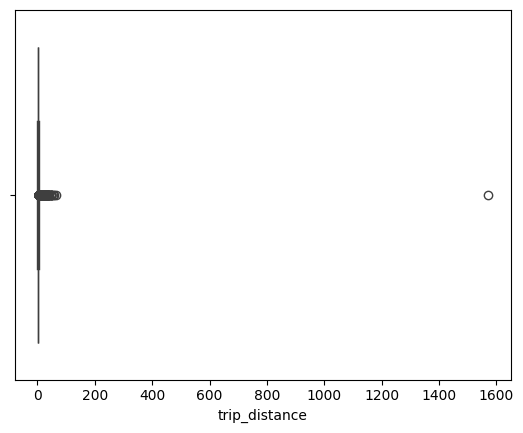

In [17]:
sns.boxplot(x='trip_distance', data=df_taxi_nyc)

In [18]:
Q1 = df_taxi_nyc['trip_distance'].quantile(0.25)
Q3 = df_taxi_nyc['trip_distance'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df_taxi_nyc = df_taxi_nyc[(df_taxi_nyc['trip_distance']>0)&(df_taxi_nyc['trip_distance']<upper_bound)]
df_taxi_nyc.describe()

,vendor_id,lpep_pickup_datetime,lpep_dropoff_datetime,ratecode_id,pu_location_id,do_location_id,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,55345.000000,55345,55345,55345.000000,55345.000000,55345.000000,55345.000000,55345.000000,55345.000000,55345.000000,55345.000000,55345.000000,55345.000000,55345.000000,55345.000000,55345.000000,55345.000000,55345.000000
mean,1.872617,2023-01-16 23:14:34.603613952,2023-01-16 23:30:29.796494592,1.053609,94.765905,137.493685,1.322143,2.052106,13.406666,0.885834,0.618041,1.855475,0.027375,0.952212,18.238048,1.374162,1.011817,0.717644
min,1.000000,2022-12-09 14:10:49,2022-12-09 14:22:26,1.000000,3.000000,3.000000,0.000000,0.010000,-70.000000,-2.500000,-0.500000,0.000000,0.000000,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,2023-01-09 13:04:37,2023-01-09 13:21:18,1.000000,74.000000,74.000000,1.000000,1.140000,8.600000,0.000000,0.500000,0.000000,0.000000,1.000000,12.200000,1.000000,1.000000,0.000000
50%,2.000000,2023-01-17 09:48:27,2023-01-17 10:07:35,1.000000,75.000000,138.000000,1.000000,1.730000,12.100000,0.000000,0.500000,1.580000,0.000000,1.000000,16.400000,1.000000,1.000000,0.000000
75%,2.000000,2023-01-24 16:29:11,2023-01-24 16:44:48,1.000000,97.000000,223.000000,1.000000,2.690000,17.000000,2.500000,0.500000,3.100000,0.000000,1.000000,22.680000,2.000000,1.000000,2.750000
max,2.000000,2023-02-01 03:10:05,2023-02-01 17:27:05,5.000000,265.000000,265.000000,8.000000,5.970000,455.000000,12.500000,1.500000,222.220000,11.750000,1.000000,456.000000,4.000000,2.000000,2.750000
std,0.333404,NaN,NaN,0.457778,57.051812,76.974062,0.990829,1.249524,7.569845,1.262746,0.342372,2.437689,0.415595,0.190316,9.091209,0.502269,0.108062,1.207868


In [19]:
# Menghilangkan negatif value
df_taxi_nyc = df_taxi_nyc[df_taxi_nyc['fare_amount']>0]
df_taxi_nyc = df_taxi_nyc[df_taxi_nyc['extra']>0]
df_taxi_nyc = df_taxi_nyc[df_taxi_nyc['mta_tax']>0]
df_taxi_nyc = df_taxi_nyc[df_taxi_nyc['improvement_surcharge']>0]
df_taxi_nyc = df_taxi_nyc[df_taxi_nyc['total_amount']>0]
df_taxi_nyc = df_taxi_nyc[df_taxi_nyc['congestion_surcharge']>0]
df_taxi_nyc.shape

(6693, 19)

In [20]:
# Pengecekan kembali
df_taxi_nyc.describe()

,vendor_id,lpep_pickup_datetime,lpep_dropoff_datetime,ratecode_id,pu_location_id,do_location_id,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,6693.000000,6693,6693,6693.0,6693.000000,6693.000000,6693.000000,6693.000000,6693.000000,6693.000000,6693.000000,6693.000000,6693.000000,6693.000000,6693.000000,6693.000000,6693.0,6693.000000
mean,1.703421,2023-01-17 14:21:05.059315712,2023-01-17 14:38:24.798894336,1.0,86.388615,200.802331,1.295234,2.657853,15.587104,2.340692,0.796579,3.149880,0.007829,0.959839,24.479970,1.155984,1.0,2.749925
min,1.000000,2023-01-01 00:08:43,2023-01-01 00:17:08,1.0,7.000000,4.000000,0.000000,0.070000,3.000000,0.500000,0.500000,0.000000,0.000000,0.300000,7.250000,1.000000,1.0,2.500000
25%,1.000000,2023-01-10 11:06:25,2023-01-10 12:00:06,1.0,74.000000,143.000000,1.000000,1.710000,11.400000,1.000000,0.500000,1.560000,0.000000,1.000000,19.150000,1.000000,1.0,2.750000
50%,2.000000,2023-01-18 16:09:58,2023-01-18 16:23:40,1.0,75.000000,236.000000,1.000000,2.440000,14.900000,2.500000,0.500000,3.250000,0.000000,1.000000,23.350000,1.000000,1.0,2.750000
75%,2.000000,2023-01-25 12:36:40,2023-01-25 13:16:01,1.0,75.000000,239.000000,1.000000,3.340000,19.100000,2.750000,1.500000,4.540000,0.000000,1.000000,28.690000,1.000000,1.0,2.750000
max,2.000000,2023-01-31 23:37:23,2023-01-31 23:50:45,1.0,264.000000,264.000000,6.000000,5.970000,47.800000,5.250000,1.500000,25.450000,6.550000,1.000000,65.460000,4.000000,1.0,2.750000
std,0.456783,NaN,NaN,0.0,52.518867,63.162174,0.925224,1.262733,5.941658,1.072687,0.456783,2.166658,0.226333,0.162800,7.174356,0.367776,0.0,0.004321


### Langkah 4: Analisa dan Visualisasi Data

## Pemahaman Pola Perjalanan

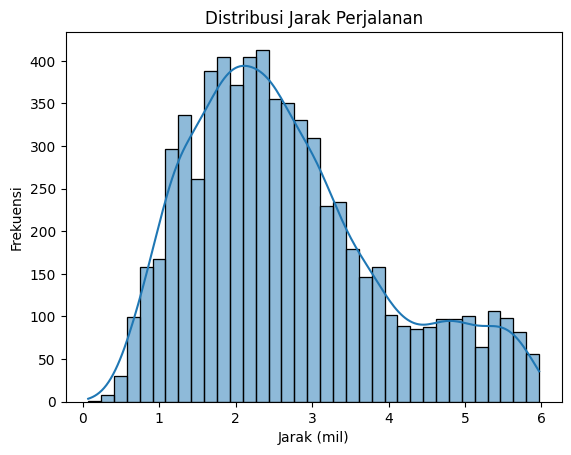

In [21]:
sns.histplot(df_taxi_nyc['trip_distance'], kde=True)
plt.title("Distribusi Jarak Perjalanan")
plt.xlabel("Jarak (mil)")
plt.ylabel("Frekuensi")
plt.show()


In [22]:
pickup_counts = df_taxi_nyc['pu_location_id'].value_counts().head(10)
dropoff_counts = df_taxi_nyc['do_location_id'].value_counts().head(10)

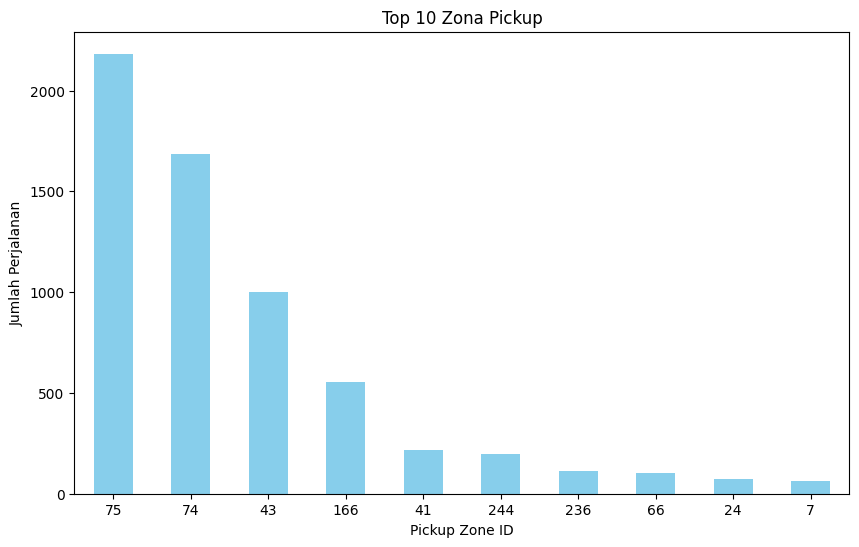

In [23]:
# Visualisasi zona pickup paling sering digunakan
plt.figure(figsize=(10, 6))
pickup_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Zona Pickup')
plt.xlabel('Pickup Zone ID')
plt.ylabel('Jumlah Perjalanan')
plt.xticks(rotation=0)
plt.show()

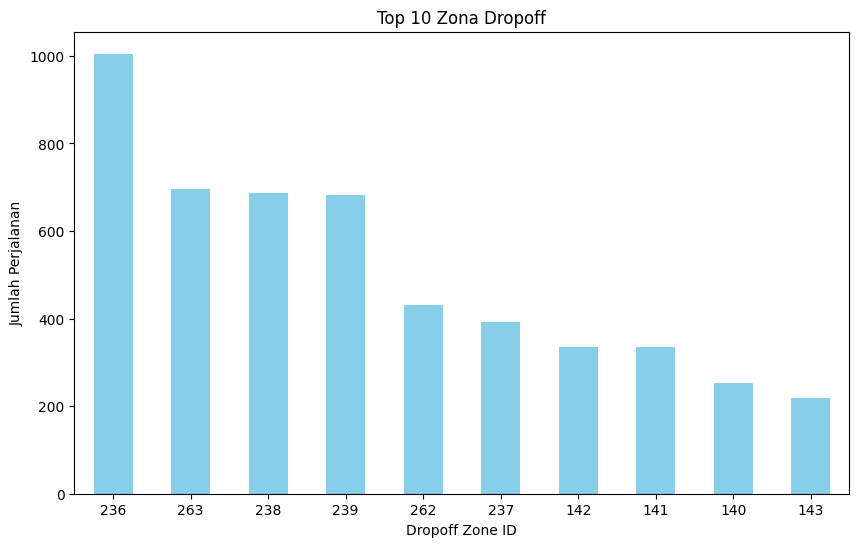

In [24]:
# Visualisasi zona pickup paling sering digunakan
plt.figure(figsize=(10, 6))
dropoff_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Zona Dropoff')
plt.xlabel('Dropoff Zone ID')
plt.ylabel('Jumlah Perjalanan')
plt.xticks(rotation=0)
plt.show()

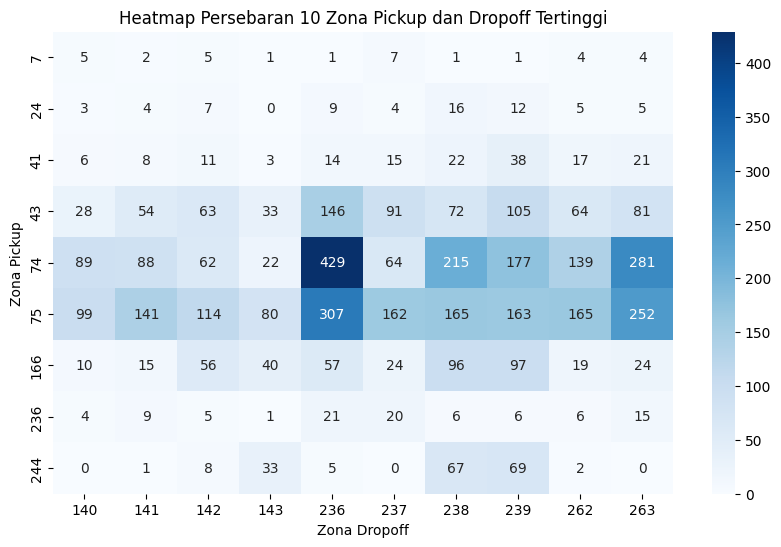

In [25]:
# Identifikasi 10 zona pickup dan dropoff tertinggi
top_pickup_zones = df_taxi_nyc['pu_location_id'].value_counts().head(10).index
top_dropoff_zones = df_taxi_nyc['do_location_id'].value_counts().head(10).index

# Filter data hanya untuk 10 zona pickup dan dropoff tertinggi
filtered_zone_heatmap = df_taxi_nyc[
    df_taxi_nyc['pu_location_id'].isin(top_pickup_zones) &
    df_taxi_nyc['do_location_id'].isin(top_dropoff_zones)
]

# Buat pivot table untuk zona teratas
zone_heatmap_top = filtered_zone_heatmap.pivot_table(
    index='pu_location_id',
    columns='do_location_id',
    aggfunc='size',
    fill_value=0
)

# Visualisasi heatmap untuk zona teratas
plt.figure(figsize=(10, 6))
sns.heatmap(zone_heatmap_top, cmap='Blues', cbar=True, annot=True, fmt='d')
plt.title('Heatmap Persebaran 10 Zona Pickup dan Dropoff Tertinggi')
plt.xlabel('Zona Dropoff')
plt.ylabel('Zona Pickup')
plt.show()


## Optimasi Pengelolaan Waktu

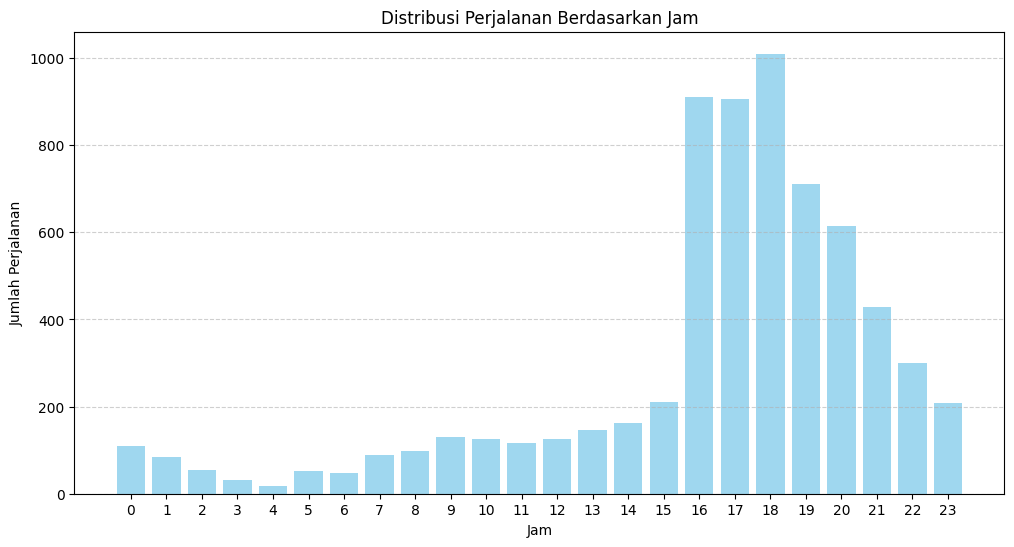

In [28]:
# Tambahkan kolom jam pickup
df_taxi_nyc['pickup_hour'] = df_taxi_nyc['lpep_pickup_datetime'].dt.hour

# Hitung jumlah perjalanan per jam
hourly_demand = df_taxi_nyc['pickup_hour'].value_counts().sort_index()

# Visualisasi permintaan perjalanan berdasarkan jam
plt.figure(figsize=(12, 6))
plt.bar(hourly_demand.index, hourly_demand.values, color='skyblue', alpha=0.8)
plt.title('Distribusi Perjalanan Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Perjalanan')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.6)

Melihat dari distribusi histogram dan menurut website https://gottalovenewyork.com/new-york-rush-hour/#:~:text=Rush%20Hour%20in%20New%20York,especially%20if%20you%20are%20driving. bahwa *Rush Hour* terjadi di pagi hari pada **jam 07.00 - 10.00** dan di sore hari pada **jam 15.00 - 18.00**

## Analisis Biaya dan Pendapatan

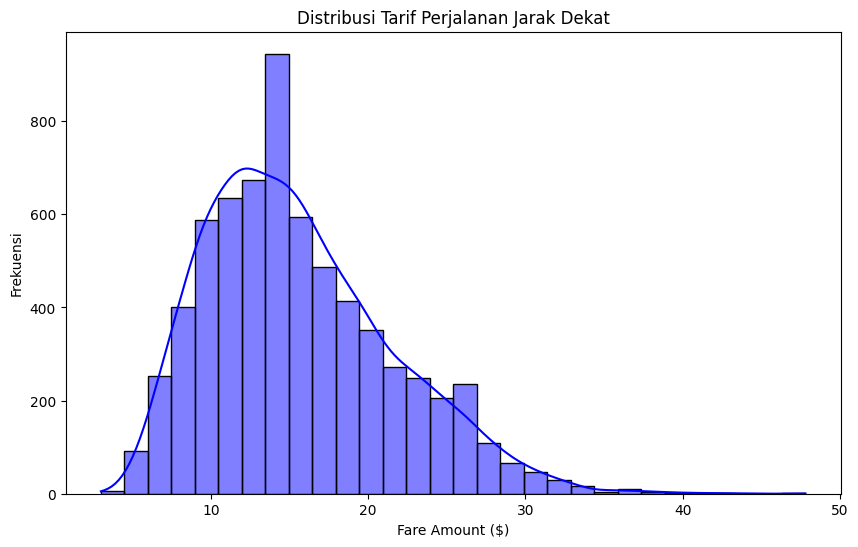

In [29]:
# Visualisasi distribusi fare_amount untuk perjalanan jarak dekat menggunakan histogram
plt.figure(figsize=(10,6))
sns.histplot(df_taxi_nyc['fare_amount'], bins=30, kde=True, color='blue')
plt.title("Distribusi Tarif Perjalanan Jarak Dekat")
plt.xlabel("Fare Amount ($)")
plt.ylabel("Frekuensi")
plt.show()


In [30]:
mean_fare = df_taxi_nyc['fare_amount'].mean()
print(mean_fare)

15.587104437471984


In [31]:
df_taxi_nyc['additional_fees'] = df_taxi_nyc['mta_tax'] + df_taxi_nyc['tolls_amount'] + df_taxi_nyc['improvement_surcharge']
df_taxi_nyc['tip_percentage'] = (df_taxi_nyc['tip_amount'] / df_taxi_nyc['total_amount']) * 100


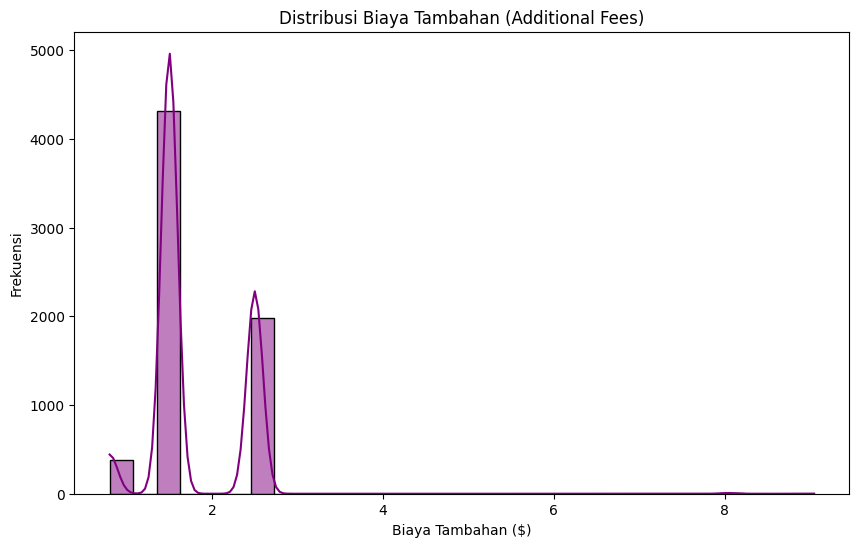

In [32]:
# Visualisasi Additional Fees menggunakan histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_taxi_nyc['additional_fees'], bins=30, kde=True, color='purple')
plt.title("Distribusi Biaya Tambahan (Additional Fees)")
plt.xlabel("Biaya Tambahan ($)")
plt.ylabel("Frekuensi")
plt.show()




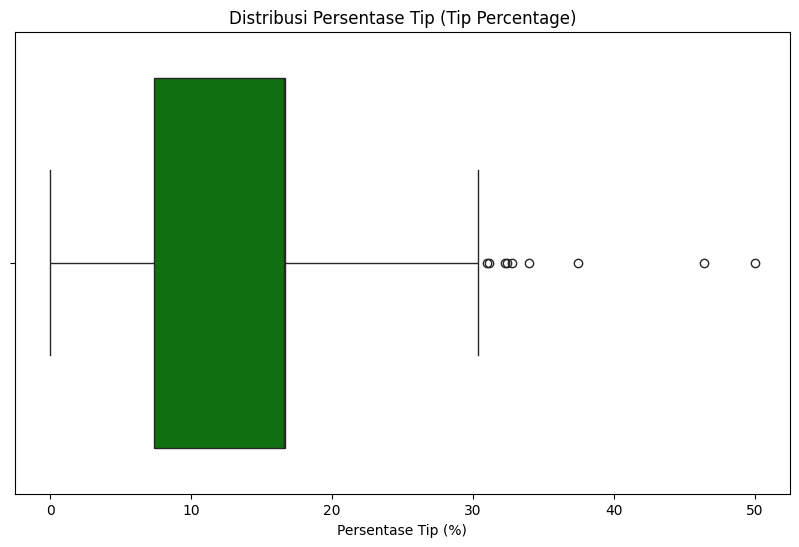

In [33]:
# Visualisasi Tip Percentage menggunakan box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_taxi_nyc['tip_percentage'], color='green')
plt.title("Distribusi Persentase Tip (Tip Percentage)")
plt.xlabel("Persentase Tip (%)")
plt.show()

In [45]:
df_taxi_nyc['tip_percentage'].mean()
print(df_taxi_nyc['tip_percentage'].mean())

12.348934488351766


## Evaluasi Metode Pembayaran

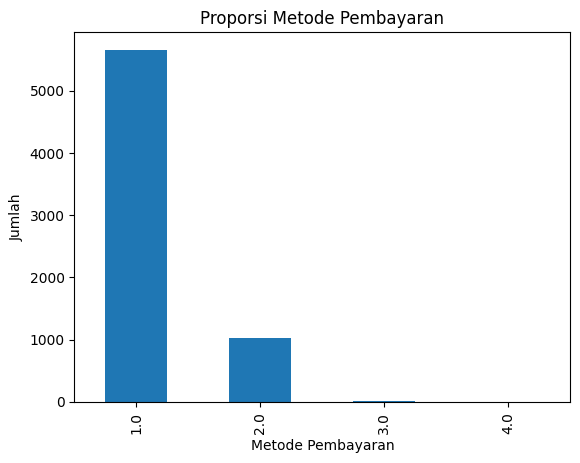

In [34]:
payment_method_counts = df_taxi_nyc['payment_type'].value_counts()
payment_method_counts.plot(kind='bar')
plt.title("Proporsi Metode Pembayaran")
plt.xlabel("Metode Pembayaran")
plt.ylabel("Jumlah")
plt.show()


C:\Users\Lukik\AppData\Local\Temp\ipykernel_12776\1170704367.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='payment_type', y='tip_amount', data=avg_tip_by_payment, palette='muted')


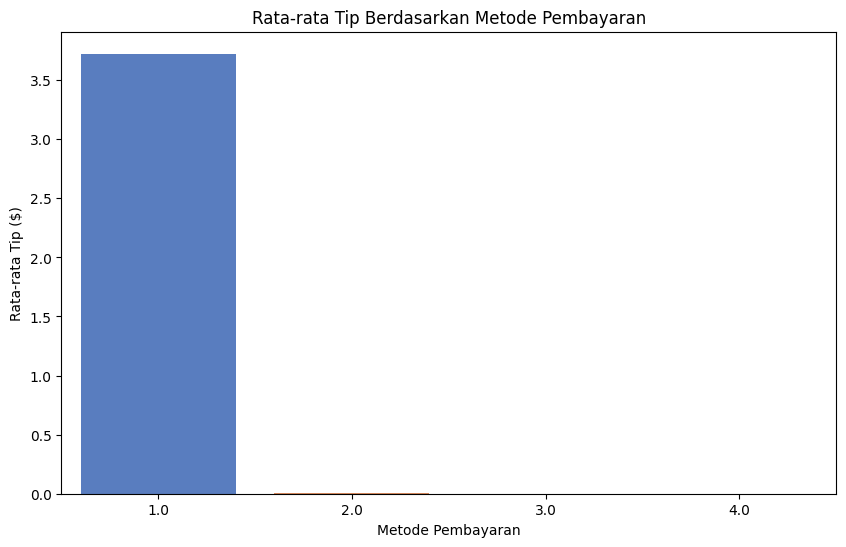

In [35]:
# Hitung rata-rata tip berdasarkan metode pembayaran
avg_tip_by_payment = df_taxi_nyc.groupby('payment_type')['tip_amount'].mean().reset_index()

# Visualisasi rata-rata tip berdasarkan metode pembayaran menggunakan bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='payment_type', y='tip_amount', data=avg_tip_by_payment, palette='muted')
plt.title("Rata-rata Tip Berdasarkan Metode Pembayaran")
plt.xlabel("Metode Pembayaran")
plt.ylabel("Rata-rata Tip ($)")
plt.show()


In [36]:
print(avg_tip_by_payment)

   payment_type  tip_amount
0           1.0    3.723878
1           2.0    0.004888
2           3.0    0.000000
3           4.0    0.000000


## Perencanaan Layanan dan Pengaturan Tarif

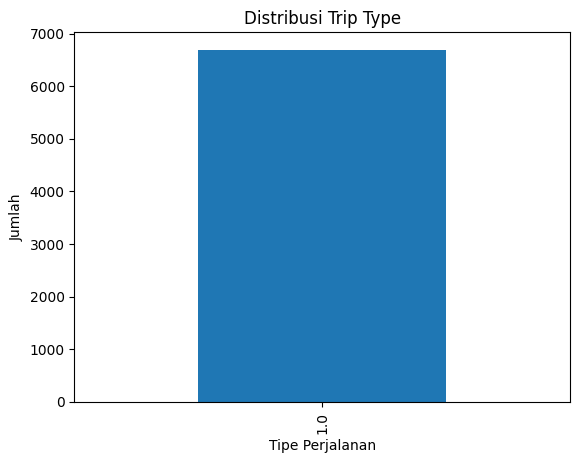

In [37]:
trip_type_counts = df_taxi_nyc['trip_type'].value_counts()
trip_type_counts.plot(kind='bar')
plt.title("Distribusi Trip Type")
plt.xlabel("Tipe Perjalanan")
plt.ylabel("Jumlah")
plt.show()


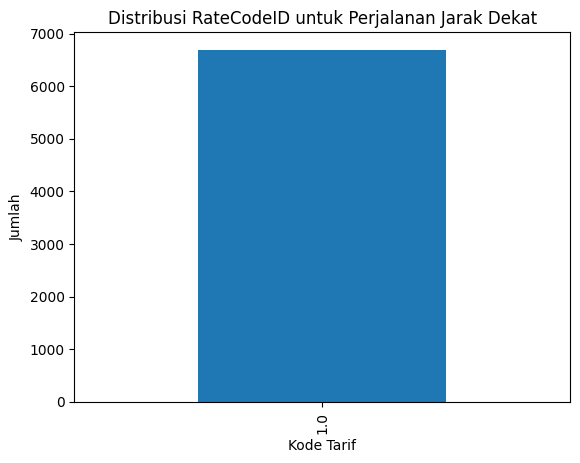

In [38]:
rate_code_counts = df_taxi_nyc['ratecode_id'].value_counts()
rate_code_counts.plot(kind='bar')
plt.title("Distribusi RateCodeID untuk Perjalanan Jarak Dekat")
plt.xlabel("Kode Tarif")
plt.ylabel("Jumlah")
plt.show()


## Langkah 5: Uji Korelasi

- Korelasi antara trip_distance dan fare_amount:

Hipotesis Nol (H₀): Tidak ada hubungan linier antara jarak perjalanan (trip_distance) dan tarif yang dikenakan (fare_amount).

Hipotesis Alternatif (H₁): Ada hubungan linier positif antara jarak perjalanan dan tarif yang dikenakan, yang berarti semakin jauh perjalanan, semakin tinggi tarif yang dikenakan.

Pengambilan kesimpulan :

- p-value $\leq \alpha$ : Reject $H_{0}$
- p-value $> \alpha$ : Failed to Reject $H_{0}$ / Accept $H_{0}$

In [39]:
from scipy.stats import pearsonr

correlation, pvalue = pearsonr(df['trip_distance'], df['fare_amount'])

alpha = 0.05
if pvalue < alpha:
    print("Hasil: Menolak H0, Ada hubungan linier positif antara jarak perjalanan dan tarif yang dikenakan, yang berarti semakin jauh perjalanan, semakin tinggi tarif yang dikenakan.")
else:
    print("Hasil: Gagal menolak H0, Ada hubungan linier positif antara jarak perjalanan dan tarif yang dikenakan, yang berarti semakin jauh perjalanan, semakin tinggi tarif yang dikenakan.")

print(f" p-value : {pvalue}")

Hasil: Menolak H0, Ada hubungan linier positif antara jarak perjalanan dan tarif yang dikenakan, yang berarti semakin jauh perjalanan, semakin tinggi tarif yang dikenakan.
 p-value : 0.0008034267307104949


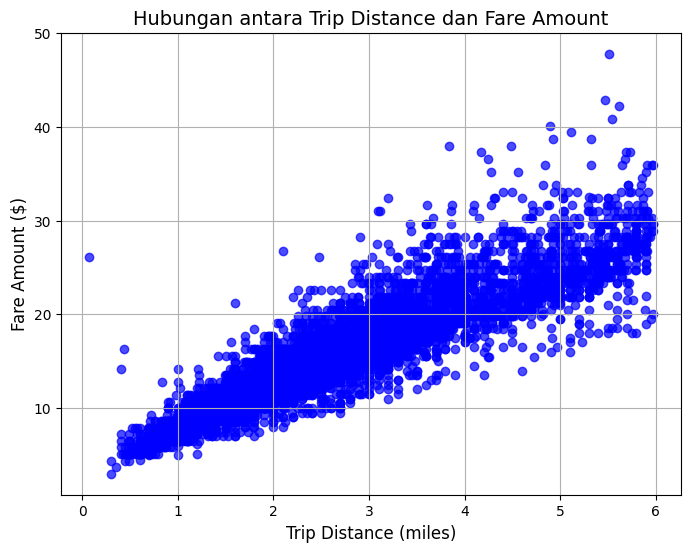

In [40]:
# Membuat scatter plot antara trip_distance dan fare_amount
plt.figure(figsize=(8,6))
plt.scatter(df_taxi_nyc['trip_distance'], df_taxi_nyc['fare_amount'], color='blue', alpha=0.7)

# Menambahkan label dan judul
plt.title('Hubungan antara Trip Distance dan Fare Amount', fontsize=14)
plt.xlabel('Trip Distance (miles)', fontsize=12)
plt.ylabel('Fare Amount ($)', fontsize=12)

# Menampilkan grid dan plot
plt.grid(True)
plt.show()


- Korelasi antara fare_amount dan additional_fees:

Hipotesis Nol (H₀): Tidak ada hubungan linier antara tarif (fare_amount) dan biaya tambahan (additional_fees).

Hipotesis Alternatif (H₁): Ada hubungan linier positif antara tarif dan biaya tambahan, yang berarti semakin tinggi tarif, semakin besar biaya tambahan (misalnya, pajak, tol).

Pengambilan kesimpulan :

- p-value $\leq \alpha$ : Reject $H_{0}$
- p-value $> \alpha$ : Failed to Reject $H_{0}$ / Accept $H_{0}$

In [41]:
correlation_fare_additional_fees, p_value = pearsonr(df_taxi_nyc['fare_amount'], df_taxi_nyc['additional_fees'])

alpha = 0.05
if p_value < alpha:
    print("Hasil: Menolak H0, Ada hubungan linier positif antara tarif dan biaya tambahan, yang berarti semakin tinggi tarif, semakin besar biaya tambahan (misalnya, pajak, tol).")
else:
    print("Hasil: Gagal menolak H0, Tidak ada hubungan linier antara tarif (fare_amount) dan biaya tambahan (additional_fees).")

print(f" p-value : {p_value}")

Hasil: Gagal menolak H0, Tidak ada hubungan linier antara tarif (fare_amount) dan biaya tambahan (additional_fees).
 p-value : 0.5850556202080369


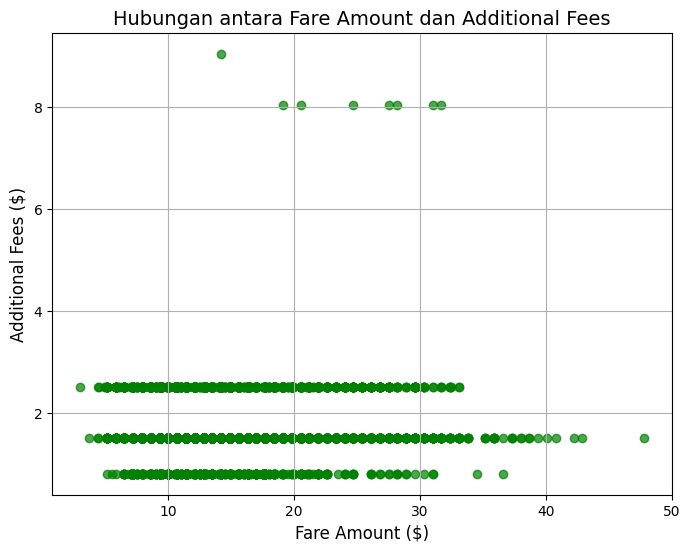

In [42]:
# Membuat scatter plot antara fare_amount dan additional_fees
plt.figure(figsize=(8,6))
plt.scatter(df_taxi_nyc['fare_amount'], df_taxi_nyc['additional_fees'], color='green', alpha=0.7)

# Menambahkan label dan judul
plt.title('Hubungan antara Fare Amount dan Additional Fees', fontsize=14)
plt.xlabel('Fare Amount ($)', fontsize=12)
plt.ylabel('Additional Fees ($)', fontsize=12)

# Menampilkan grid dan plot
plt.grid(True)
plt.show()


- Korelasi antara tip_amount dan payment_type:

Hipotesis Nol (H₀): Tidak ada hubungan antara jumlah tip yang diberikan (tip_amount) dan metode pembayaran (payment_type).

Hipotesis Alternatif (H₁): Ada hubungan antara metode pembayaran dan jumlah tip yang diberikan, yang berarti pelanggan yang membayar menggunakan metode tertentu cenderung memberikan tip yang lebih tinggi.
Pengambilan kesimpulan :

- p-value $\leq \alpha$ : Reject $H_{0}$
- p-value $> \alpha$ : Failed to Reject $H_{0}$ / Accept $H_{0}$

In [43]:
correlation_tip_payment, p_value = pearsonr(df_taxi_nyc['tip_amount'], df_taxi_nyc['payment_type'])

alpha = 0.05
if p_value < alpha:
    print("Hasil: Menolak H0, Ada hubungan antara metode pembayaran dan jumlah tip yang diberikan, yang berarti pelanggan yang membayar menggunakan metode tertentu cenderung memberikan tip yang lebih tinggi.")
else:
    print("Hasil: Gagal menolak H0, Tidak ada hubungan antara jumlah tip yang diberikan (tip_amount) dan metode pembayaran (payment_type).")

print(f" p-value : {p_value}")

Hasil: Menolak H0, Ada hubungan antara metode pembayaran dan jumlah tip yang diberikan, yang berarti pelanggan yang membayar menggunakan metode tertentu cenderung memberikan tip yang lebih tinggi.
 p-value : 0.0


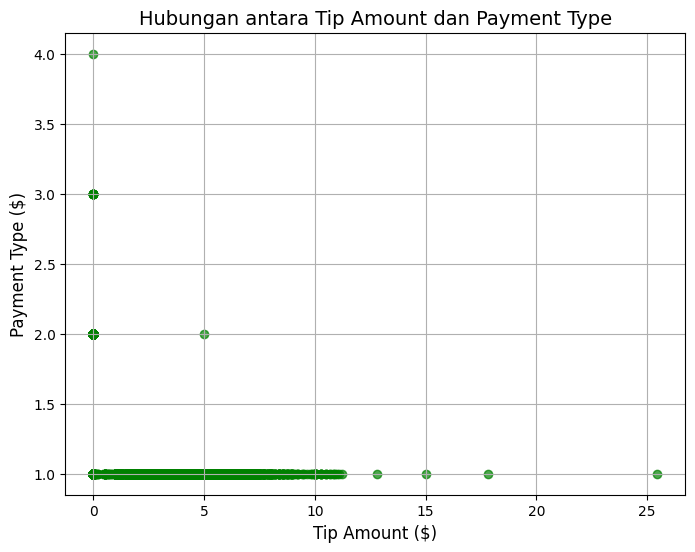

In [44]:
# Membuat scatter plot antara tip_amount dan payment_type
plt.figure(figsize=(8,6))
plt.scatter(df_taxi_nyc['tip_amount'], df_taxi_nyc['payment_type'], color='green', alpha=0.7)

# Menambahkan label dan judul
plt.title('Hubungan antara Tip Amount dan Payment Type', fontsize=14)
plt.xlabel('Tip Amount ($)', fontsize=12)
plt.ylabel('Payment Type ($)', fontsize=12)

# Menampilkan grid dan plot
plt.grid(True)
plt.show()


### Langkah 6: Hasil dan Kesimpulan

- **Hasil**

1. Pemahaman Pola Perjalanan
    - Tujuan: Untuk mengidentifikasi karakteristik perjalanan jarak dekat, seperti lokasi yang paling sering digunakan (pickup dan drop-off), waktu perjalanan yang paling sibuk, dan distribusi jarak perjalanan.
    Hasil : rentang distribusi perjalananya dari 0.07 sampai 5.97 miles.
            Zona pickup paling sering digunakan : [75, 74, 43, 166, 41, 244, 236, 66, 24, 7]
            Zona dropoff paling sering digunakan : [236, 263, 238, 239, 262, 237, 142, 141, 140, 143]

2. Optimasi Pengelolaan Waktu
    - Tujuan: Memahami pola waktu perjalanan (seperti jam sibuk, hari, atau bulan) agar layanan bisa lebih terencana dengan baik.
    Hasil : *Rush Hour* terjadi di pagi hari pada **jam 07.00 - 10.00** dan di sore hari pada **jam 15.00 - 18.00**.

3. Analisis Biaya dan Pendapatan
    - Tujuan: Memahami biaya total perjalanan (termasuk tarif dasar dan biaya tambahan) serta pengaruh tip terhadap total pendapatan.
    Haasil : Rata-rata biaya perjalanan berada di angka $15.58.
             Biaya tambahan yang diberikan tidak terlalu besar.
             Rata-rata tip yang diberikan berada di angka 12.34%.

4. Evaluasi Metode Pembayaran
    - Tujuan: Mengetahui metode pembayaran yang paling sering digunakan oleh pelanggan (misalnya, kartu kredit atau tunai) dan hubungannya dengan tip yang diberikan.
    Hasil : Metode yang sering digunakan untuk pembayaran adalah `Credit Card` dan `Cash`.
            Orang-orang yang menggunakan metode `Credit Card` cenderung lebih sering memberi tip.

5. Perencanaan Layanan dan Pengaturan Tarif
    - Tujuan: Menganalisis jenis perjalanan (street-hail atau dispatch) dan jenis tarif yang sering diterapkan untuk perjalanan jarak dekat.
    Hasil : Dari data ini, keselurahn pengguna taxi menggunakan tipe trip `Street-hail`
            Dari data ini, keselurahn pengguna taxi menggunakan ratecode  `Standard rate`


- **Kesimpulan**

- Pemahaman Pola Perjalanan
    1. Rentang perjalanannya berkisar di 0.07 - 5.97 miles. Apabila ingin menambah revenue, armada taxi bisa melakukan perjalnan berentang pendek, namun sesering mungkin. 
    2. 10 Zona pickup paling ramai berada di zona [75, 74, 43, 166, 41, 244, 236, 66, 24, 7]. Maka armada taxi dapat dikerahkan lebih banyak di antara zona-zona tersebut.

- Optimasi Pengelolaan Waktu
    1. *Rush Hour* terjadi di pagi hari pada **jam 07.00 - 10.00** dan di sore hari pada **jam 15.00 - 18.00**. Hal ini dapat dimanfaatkan untuk mendapat penghasilan berlebih, karena ada perbedaan fare amount diantara jam sibuk dan tidak.

- Analisis Biaya dan Pendapatan
    1. Rata-rata biaya perjalanan berada di angka $15.58. Rata-rata ini hanya untuk perjalanan jarak dekat saja.
    2. Dari hasil uji korelasi antara `fare amount` dengan `additional fees` tidak ada hubungan linear antara kedua variabel ini dan  biaya tambahan (seperti tolls dan tax) menyumbang sebagian kecil dari total biaya.
    
- Evaluasi Metode Pembayaran
    1. Metode yang paling sering digunakan adalah `Credit Card` dan `Cash` dan pemberian tip pada perjalanan jarak dekat tergolong cukup tinggi.

- Perencanaan Layanan dan Pengaturan Tarif
    1. Sebagian besar perjalanan jarak dekat dilakukan dengan street-hail (langsung menghentikan taksi di jalan), bukan melalui aplikasi (dispatch). Untuk pengembangan layanan, bisa dilakukan pemberian harga yang sedikit lebih murah agar orang orang beralih ke aplikasi.

